<a href="https://colab.research.google.com/github/samuelcoflo/Analitica-de-Negocios/blob/main/PARCIAL_SAMUEL_CORREA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAIVE BAYES**

0. Cargo librerias

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Graficador
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.cluster import KMeans #K-means
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

#Para no tener que cargar el archivo
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se cargan los datos

      White  HS GPA   SAT    GPA  College Parent  Grad
0         1    4.14  1410  2.949               1     1
1         1    3.30  1260  2.789               1     1
2         0    4.30   950  2.851               0     1
3         1    4.29  1290  3.533               1     1
4         1    4.20  1350  3.301               1     1
...     ...     ...   ...    ...             ...   ...
1995      1    3.18  1400  3.118               1     1
1996      0    3.82  1230  2.640               1     0
1997      0    3.74  1140  2.283               0     0
1998      1    3.75  1260  3.193               1     1
1999      0    3.08   950  2.090               0     0

[2000 rows x 6 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Esta es la matriz de correlacion:
                    White    HS GPA       SAT       GPA  College Parent  \
White           1.000000  0.130981  0.191930  0.194132       -0.005987   
HS GPA          0.130981  1.000000  0.346767  0.376932        0.020068   
SAT             0.191930  0.346767  1.000000  0.260927       -0.029768   
GPA             0.194132  0.376932  0.260927  1.000000       -0.015137   
College Parent -0.005987  0.020068 -0.029768 -0.015137        1.000000   
Grad            0.133612  0.283404  0.172794  0.726624       -0.018035   

                    Grad  
White           0.133612  
HS GPA          0.283404  
SAT             0.172794  
GPA             0.726624  
College Parent -0.018035  
Grad            1.000000  


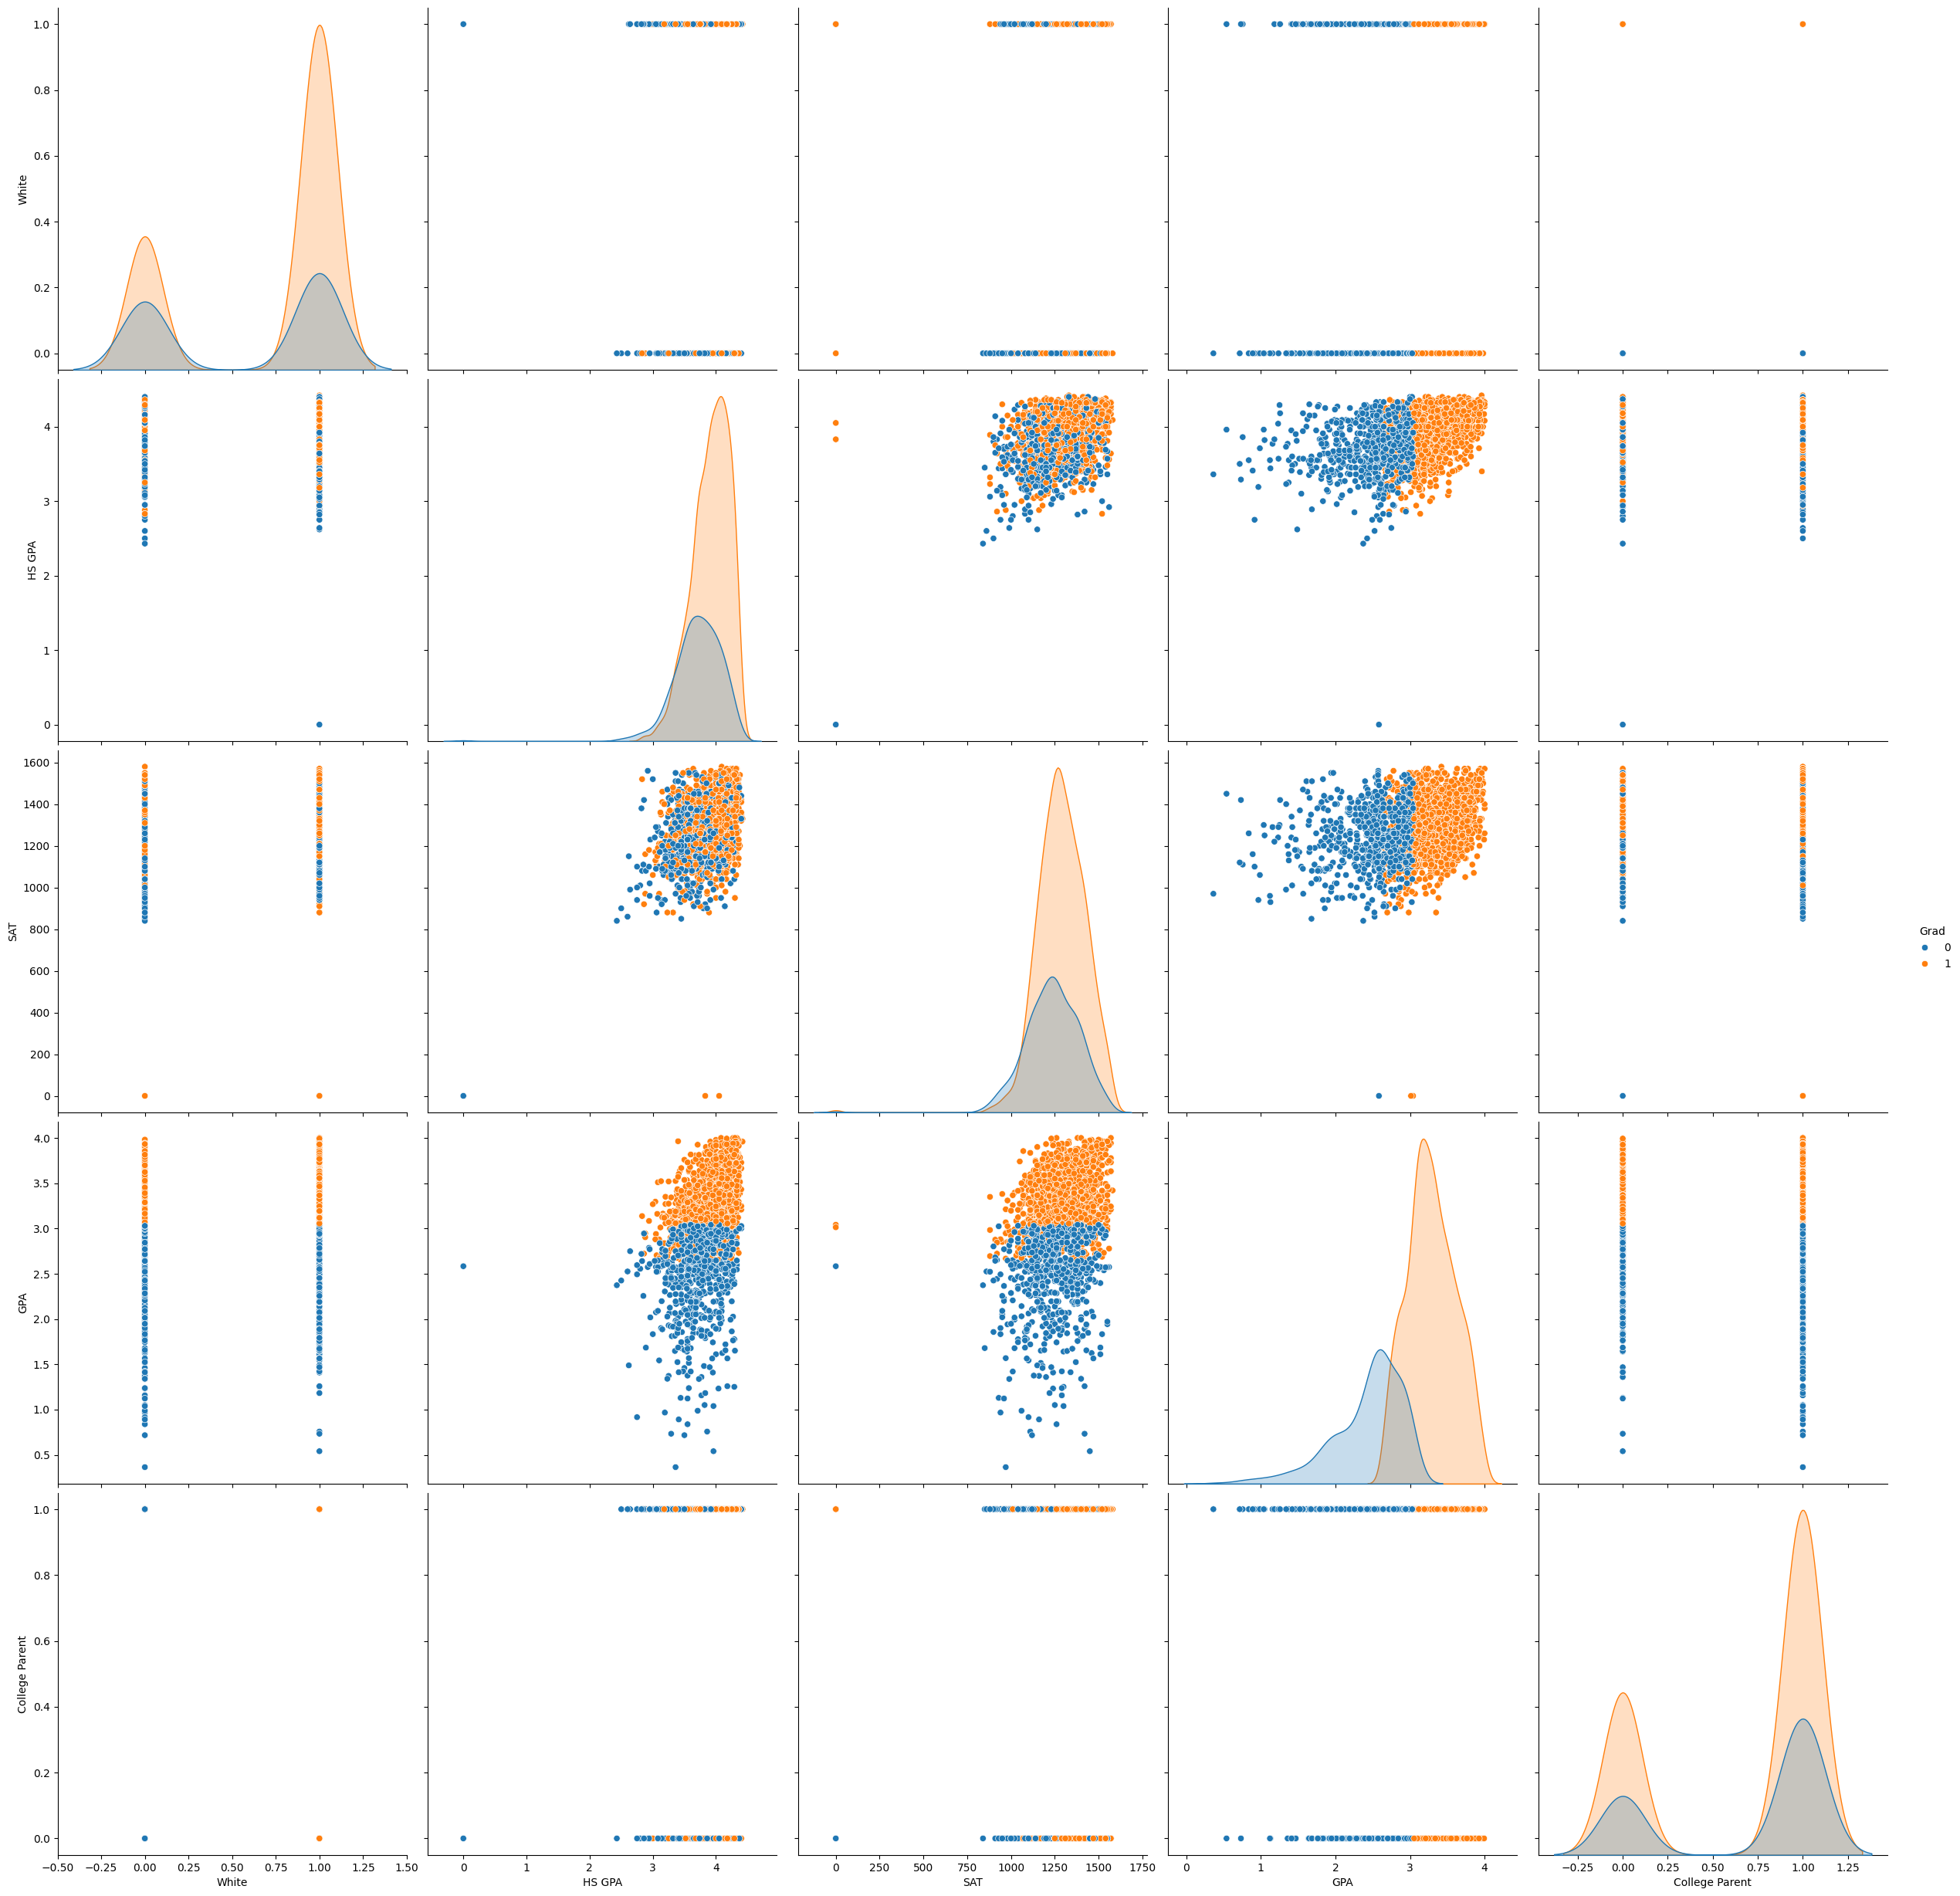

In [ ]:
nxl='/content/drive/MyDrive/Analitica de Negocios/4. BD_Parcial_L_int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna() #Borra las celdas vacias
XDB.head(100)

#Selección de las variables de interés
XDB=XDB[['White','HS GPA','SAT', 'GPA', 'College Parent', 'Grad']]

#Datos de entrada
XD=np.array(XDB[['White','HS GPA','SAT', 'GPA', 'College Parent']])

#Datos de salida
yd=np.array(XDB['Grad'])
print(XDB)

sns.pairplot(XDB, hue='Grad', size=5,vars=['White', 'HS GPA','SAT', 'GPA', 'College Parent'])

#Para confirmar la buena correlacion
corr = XDB.corr()
print("Esta es la matriz de correlacion:\n",corr)

#Se procede con la configuracion de los datos de entrada y salida
XD=np.array(XDB.iloc[:,0:5])      #Toma las variables de entrada
yd=np.array(XDB.iloc[:,5])        #Enroll

2. Implemento el modelo

In [ ]:
#Implementación del modelo

mnb=GaussianNB()
mnb.fit(XD,yd)
ydp=mnb.predict(XD)

#Parametros del modelo por categoria - Urbana o Rural
u=mnb.theta_
sigma=np.sqrt(mnb.var_)

#Metrica de evaluación - Como se comporto el modelo identificando Urbano o Rural
cm=confusion_matrix(yd,ydp)
print("La matriz de confusion es:")
print(cm)

La matriz de confusion es:
[[ 452  164]
 [ 102 1282]]


3. Evaluo el modelo

In [ ]:
#Evaluación del modelo

VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

Ex=(VN+VP)/(VN+VP+FN+FP)
print("La exactitud alcanzada por el modelo es: ",Ex)

Se=VP/(FN+VP) #Como le fue con los positivos
print("La sensibilidad alcanzada por el modelo es: ",Se)

Es=VN/(VN+FP) #Como le fue con los negativos
print("La especificidad alcanzada por el modelo es: ",Es)



La exactitud alcanzada por el modelo es:  0.867
La sensibilidad alcanzada por el modelo es:  0.9263005780346821
La especificidad alcanzada por el modelo es:  0.7337662337662337


4. Que pasa con los individuos de la hoja 2

In [ ]:
#Individuos especificos a evaluar

Xun1=np.array([[0,1,4,1260,1.9]]) #Persona especifica
ydun1=mnb.predict(Xun1)
print(ydun1)

Xun2=np.array([[0,1,2.91,1090,2.719]]) #Persona especifica
ydun2=mnb.predict(Xun2)
print(ydun2)

Xun3=np.array([[1,0,3.58,1210,3.319]]) #Persona especifica
ydun3=mnb.predict(Xun3)
print(ydun3)

[0]
[0]
[0]


**Arboles de decision**

0. Creacion Decision tree

In [ ]:
mar=DecisionTreeClassifier(criterion='gini', max_depth=4) #6 variables de entrada
mar.fit(XD,yd)

ydp=mar.predict(XD)
cm2=confusion_matrix(yd,ydp)
print(cm2)

#Evaluación del modelo
VN2=cm2[0,0]; FP2=cm2[0,1]; FN2=cm2[1,0]; VP2=cm2[1,1]

Ex2=(VN2+VP2)/(VN2+VP2+FN2+FP2)  #Que porcentaje de los datos pronostico correctamente
print("La exactitud alcanzada por el modelo es: ",Ex2)

Se2=VP2/(FN2+VP2) #Como le fue con los positivos
print("La sensibilidad alcanzada por el modelo es: ",Se2)

Es2=VN2/(VN2+FP2) #Como le fue con los negativos
print("La especificidad alcanzada por el modelo es: ",Es2)

[[ 422  194]
 [   2 1382]]
La exactitud alcanzada por el modelo es:  0.902
La sensibilidad alcanzada por el modelo es:  0.9985549132947977
La especificidad alcanzada por el modelo es:  0.685064935064935


1. Donde esta??

In [ ]:
vs=['White', 'HS GPA','SAT', 'GPA', 'College Parent'] #Títulos de los nodos del Arbol
dot_graph=export_graphviz(mar,feature_names=vs)
graph=graph_from_dot_data(dot_graph)
graph.write_png('arbolParcial.png')

True

In [ ]:
XDB2=pd.read_excel(nxl,sheet_name=1)
XDB2=XDB2.dropna() #Borra las celdas vacias
XDB2.head()

,Sex,White,HS GPA,SAT,GPA,College Parent
0,F,1,4.00,1260,1.900,1
1,F,1,2.91,1090,2.719,1
2,M,0,3.58,1210,3.319,1


3. Modelo K-Means

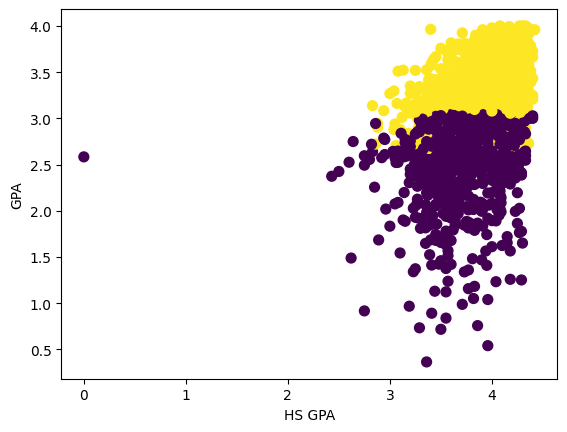

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10)   #10 vecinos
mknn.fit(XD,yd)                             #Ajuste del modelo

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)

# Calculate XDP based on prediction (assuming XDP should hold features based on ydp)
XDP = XD[ydp == 1]  # Example: Selecting features where prediction is 1

#Las graficas se hacen con las variables que tienen mas correlacion
plt.scatter(XD[:,1],XD[:,3],c=yd,s=50,cmap='viridis')
plt.xlabel('HS GPA')
plt.ylabel('GPA')
plt.show()

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10)   #Tomar 10 vecinos
mknn.fit(XD,yd)                             #Se ajusta el modelo

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de Confusion
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print("Esta es la matriz de confusion:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Spec=VN/(VN+FP)
print("Exactitud:",Exac)
print("Sensibilidad:",Sen)
print("Especificidad:",Spec)

Esta es la matriz de confusion:
 [[ 386  230]
 [  69 1315]]
Exactitud: 0.8505
Sensibilidad: 0.9501445086705202
Especificidad: 0.6266233766233766


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Donde quedó el primer estudiante 2
Donde quedó el segundo estudiante 3
Donde quedó el tercer estudiante 0


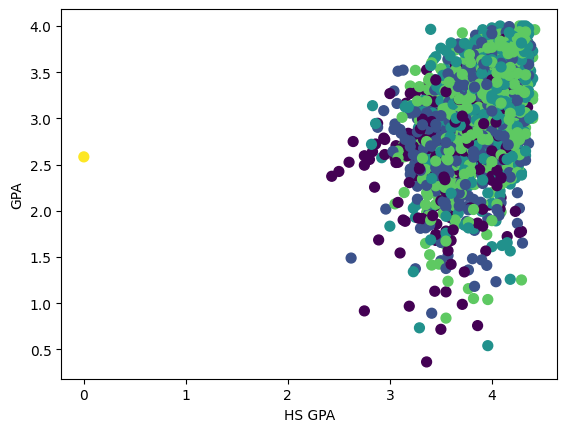

Total de personas a graduarse en el cluster 0: 131
Total de personas del cluster 0: 269
Porcentaje de No graduados para el Cluster 0 es: 0.5130111524163569
Porcentaje de Graduados para el Cluster 0 es: 0.48698884758364314
Total de personas a graduarse en el cluster 1: 371
Total de personas del cluster 1: 554
Porcentaje de No graduados para el Cluster 1 es: 0.3303249097472924
Porcentaje de Graduados para el Cluster 1 es: 0.6696750902527075
Total de personas a graduarse en el cluster 2: 370
Total de personas del cluster 2: 488
Porcentaje de No Graduados para el Cluster 2 es: 0.24180327868852458
Porcentaje de Graduados para el Cluster 2 es: 0.7581967213114754
Total de personas a graduarse en el cluster 3: 510
Total de personas del cluster 3: 686
Porcentaje de No graduados para el Cluster 3 es: 0.2565597667638484
Porcentaje de Graduados para el Cluster 3 es: 0.7434402332361516
Total de personas a graduarse en el cluster 4: 2
Total de personas del cluster 4: 3
Porcentaje de No graduados par

In [ ]:
np.random.seed(42)

mkm=KMeans(n_clusters=5,init='random', random_state=42)
mkm.fit(XD,yd)
labels=mkm.labels_ #Donde quedaron clasificados cada uno de los solicitantes
print("Donde quedó el primer estudiante",labels[0])
print("Donde quedó el segundo estudiante",labels[1])
print("Donde quedó el tercer estudiante",labels[2])

plt.scatter(XD[:,1],XD[:,3],c=labels,s=50,cmap='viridis')

plt.xlabel('HS GPA');plt.ylabel('GPA')
plt.show()

#Total de personas a graduarse en el cluster 0
c01 = len(np.where((labels==0) & (yd==1))[0])
print('Total de personas a graduarse en el cluster 0:', c01)
#Cual es el porcentaje de graduados del cluster 0
c00 = len(np.where((labels==0) & (yd==0))[0])
c01 = len(np.where((labels==0) & (yd==1))[0])
c00+c01
print('Total de personas del cluster 0:', c00+c01)
print("Porcentaje de No graduados para el Cluster 0 es:", c00/(c00+c01))
print("Porcentaje de Graduados para el Cluster 0 es:", c01/(c00+c01))



#Total de personas a graduarse en el cluster 1
c11 = len(np.where((labels==1) & (yd==1))[0])
print('Total de personas a graduarse en el cluster 1:', c11)
#Cual es el porcentaje de graduados del cluster 1
c10 = len(np.where((labels==1) & (yd==0))[0])
c11 = len(np.where((labels==1) & (yd==1))[0])
c10+c11
print('Total de personas del cluster 1:', c10+c11)
print("Porcentaje de No graduados para el Cluster 1 es:", c10/(c10+c11))
print("Porcentaje de Graduados para el Cluster 1 es:", c11/(c10+c11))



#Total de personas a graduarse en el cluster 2
c21 = len(np.where((labels==2) & (yd==1))[0])
print('Total de personas a graduarse en el cluster 2:', c21)
#Cual es el porcentaje de graduados del cluster 2
c20 = len(np.where((labels==2) & (yd==0))[0])
c21 = len(np.where((labels==2) & (yd==1))[0])
c20+c21
print('Total de personas del cluster 2:', c20+c21)
print("Porcentaje de No Graduados para el Cluster 2 es:", c20/(c20+c21))
print("Porcentaje de Graduados para el Cluster 2 es:", c21/(c20+c21))



#Total de personas a graduarse en el cluster 3
c31 = len(np.where((labels==3) & (yd==1))[0])
print('Total de personas a graduarse en el cluster 3:', c31)
#Cual es el porcentaje de graduados del cluster 3
c30 = len(np.where((labels==3) & (yd==0))[0])
c31 = len(np.where((labels==3) & (yd==1))[0])
c30+c31
print('Total de personas del cluster 3:', c30+c31)
print("Porcentaje de No graduados para el Cluster 3 es:", c30/(c30+c31))
print("Porcentaje de Graduados para el Cluster 3 es:", c31/(c30+c31))



#Total de personas a graduarse en el cluster 4
c41 = len(np.where((labels==4) & (yd==1))[0])
print('Total de personas a graduarse en el cluster 4:', c41)
#Cual es el porcentaje de graduados del cluster 4
c40 = len(np.where((labels==4) & (yd==0))[0])
c41 = len(np.where((labels==4) & (yd==1))[0])
c40+c41
print('Total de personas del cluster 4:', c40+c41)
print("Porcentaje de No graduados para el Cluster 4 es:", c40/(c40+c41))
print("Porcentaje de Graduados para el Cluster 4 es:", c41/(c40+c41))



#Cual es la característica sociodemografica de cada cluster
clusters=mkm.cluster_centers_
print("Caracteristicas sociodemograficas de cada cluster:\n",clusters)

In [ ]:
#Clusters con mayor HS GPA y mayor GPA

cluster_means = mkm.cluster_centers_

# Encuentra el cluster con la media más alta para HS GPA
cluster_hs_gpa = np.argmax(cluster_means[:, 1])
print("Cluster con mayor HS GPA:", cluster_hs_gpa)

# Encuentra el cluster con la media más alta para GPA
cluster_gpa = np.argmax(cluster_means[:, 3])
print("Cluster con mayor GPA:", cluster_gpa)

Cluster con mayor HS GPA: 2
Cluster con mayor GPA: 2


In [ ]:
#Cluster con mayor cantidad de personas que se van a graduar

graduados_por_cluster = np.zeros(5)

for i in range(5):
  graduados_por_cluster[i] = len(np.where((labels==i) & (yd==1))[0])

# Encuentra el clúster con la mayor cantidad de graduados
cluster_mayor = np.argmax(graduados_por_cluster)

total_cluster = len(np.where(labels==cluster_mayor)[0])
porcentaje_graduados = graduados_por_cluster[cluster_mayor] / total_cluster

print("El clúster con la mayor cantidad de graduados es el clúster:", cluster_mayor)
print("El porcentaje de graduación en este clúster es:", porcentaje_graduados)

El clúster con la mayor cantidad de graduados es el clúster: 3
El porcentaje de graduación en este clúster es: 0.7434402332361516


In [ ]:
#Personajes especificos

XDP1=np.array([[0,1,4,1260,1.9,1]])
ydpp1=mknn.predict(XDP1)
print("En que cluster esta?",ydpp1)

XDP2=np.array([[0,1,2.91,1090,2.719,1]])
ydpp2=mknn.predict(XDP2)
print("En que cluster esta?",ydpp2)

XDP3=np.array([[1,0,3.58,1210,3.319,1]])
ydpp3=mknn.predict(XDP3)
print("En que cluster esta?",ydpp3)


En que cluster esta? [0]
En que cluster esta? [0]
En que cluster esta? [1]


**Analisis de Resultados**



El análisis de estos tres modelos de clasificación revela que el desempeño académico previo y actual es el factor más determinante para predecir la graduación de un estudiante. Tanto el HS GPA como el GPA universitario tienen una correlación significativa con la probabilidad de éxito académico, mientras que otras variables como el SAT y la situación socioeconómica también aportan información valiosa.

De los tres modelos, el Árbol de Decisión se destaca por su interpretabilidad, ya que permite identificar reglas claras para cada categoría de estudiantes. Naive Bayes ofrece un buen rendimiento en términos de predicción, aunque su precisión puede verse limitada por la independencia de las características. KMeans, aunque no es un modelo supervisado, es útil para identificar patrones de agrupación y características comunes entre los estudiantes.

Finalmente, el clúster 3 identificado por KMeans, con un 74.34% de graduación, resalta la importancia de agrupar a los estudiantes con características similares para predecir su éxito, especialmente en entornos donde los datos de salida no están disponibles o no son confiables.